# NLP Project 1: Sentiment Analysis and Modeling for Amazon Reviews with Comprehensive Dataset Analysis

This project focuses on analyzing and modeling sentiments from Amazon product reviews. The workflow includes text preprocessing, visualization, sentiment analysis, feature engineering, and sentiment modeling.

1. Text Preprocessing
2. Text Visualization
3. Sentiment Analysis
4. Feature Engineering
5. Sentiment Modeling

In [1]:
# !pip install nltk
# !pip install textblob
# !pip install wordcloud


from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1. Text Preprocessing

In [2]:
df = pd.read_csv(r"C:\Users\Naime Diler\Desktop\PycharmProjects\datasets/amazon_reviews.csv", sep=",")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [3]:
df['reviewText'].head()

0                                           No issues.
1    Purchased this for my device, it worked as adv...
2    it works as expected. I should have sprung for...
3    This think has worked out great.Had a diff. br...
4    Bought it with Retail Packaging, arrived legit...
Name: reviewText, dtype: object

#### Normalizing Case Folding

In [4]:
df['reviewText'] = df['reviewText'].str.lower()

df['reviewText'].head()

0                                           no issues.
1    purchased this for my device, it worked as adv...
2    it works as expected. i should have sprung for...
3    this think has worked out great.had a diff. br...
4    bought it with retail packaging, arrived legit...
Name: reviewText, dtype: object

#### Punctuations

In [10]:
# Removes all non-alphanumeric characters (except spaces) from the 'reviewText' column using a regular expression.

df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '', regex=True)

df['reviewText'].head()

0                                               issues
1    purchased device worked advertised never much ...
2    works expected higher capacity think made bit ...
3    think worked 64gb card went south 3 one held p...
4    bought retail packaging arrived legit version ...
Name: reviewText, dtype: object

#### Numbers

In [11]:
df['reviewText'] = df['reviewText'].str.replace('\d', '', regex=True)

df['reviewText'].head()

0                                               issues
1    purchased device worked advertised never much ...
2    works expected higher capacity think made bit ...
3    think worked gb card went south  one held pret...
4    bought retail packaging arrived legit version ...
Name: reviewText, dtype: object

#### Stopwords

In [12]:
import nltk
# nltk.download('stopwords')

sw = stopwords.words('english')

df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))


df['reviewText'].head()

0                                               issues
1    purchased device worked advertised never much ...
2    works expected higher capacity think made bit ...
3    think worked gb card went south one held prett...
4    bought retail packaging arrived legit version ...
Name: reviewText, dtype: object

#### Rarewords

In [13]:
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()

drops = temp_df[temp_df <= 1]

df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

#### Tokenization

In [14]:
# nltk.download("punkt")

df["reviewText"].apply(lambda x: TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, gb, card, went, south, one, he...
4    [bought, retail, packaging, arrived, legit, ve...
Name: reviewText, dtype: object

#### Lemmatization

In [16]:
# nltk.download('wordnet')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

## 2. Text Visualization

#### Calculation of Term Frequencies

In [17]:
tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]

tf.sort_values("tf", ascending=False)

,words,tf
25,card,5502.00
14,work,2035.00
7,phone,1891.00
37,gb,1653.00
90,great,1438.00
...,...,...
511,tape,2.00
2585,intense,2.00
2586,environment,2.00
3306,sandisksequential,2.00


#### Barplot

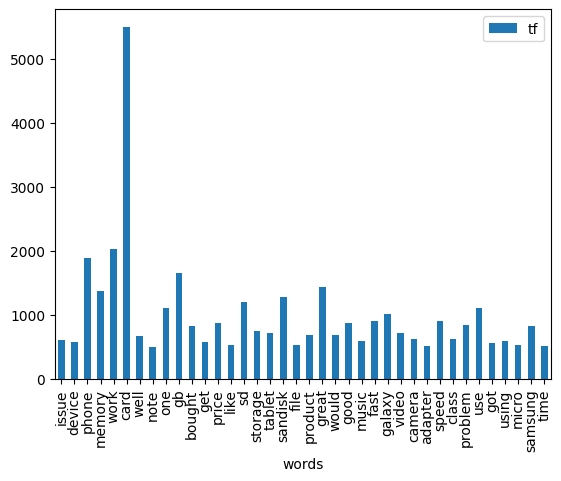

In [18]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")

plt.show(block=True)

#### Wordcloud

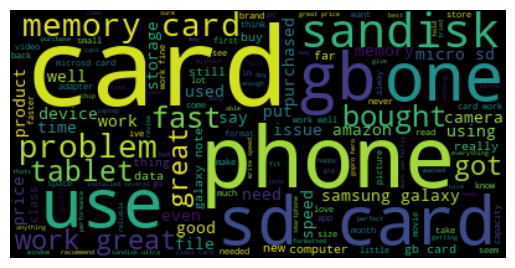

In [19]:
text = " ".join(i for i in df.reviewText)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show(block=True)

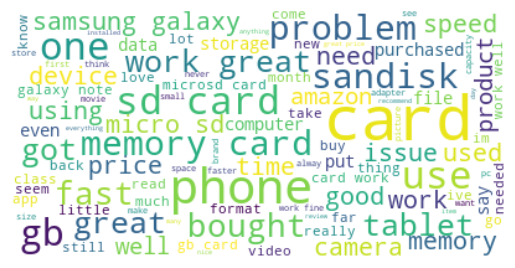

In [20]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show(block=True)

In [18]:
# If you want to save the generated word cloud as a PNG image file:

# wordcloud.to_file("wordcloud.png")

## 3. Sentiment Analysis

In [21]:
df["reviewText"].head()

0                                                issue
1    purchased device worked advertised never much ...
2    work expected higher capacity think made bit e...
3    think worked gb card went south one held prett...
4    bought retail packaging arrived legit version ...
Name: reviewText, dtype: object

In [22]:
# nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

#### Examples:

In [23]:
sia.polarity_scores("The film was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [24]:
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

#### Let's now apply the polarity_scores to df['reviewText']:

In [25]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...
3    {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'comp...
4    {'neg': 0.0, 'neu': 0.716, 'pos': 0.284, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.056, 'neu': 0.624, 'pos': 0.319, 'co...
7    {'neg': 0.048, 'neu': 0.653, 'pos': 0.299, 'co...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...
Name: reviewText, dtype: object

In [26]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.91
7   0.81
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [27]:
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])

## 4. Feature Engineering

In [28]:
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    neg
1    neg
2    pos
3    pos
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: reviewText, dtype: object

In [29]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [30]:
df["sentiment_label"].value_counts()

sentiment_label
pos    3929
neg     986
Name: count, dtype: int64

In [31]:
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg   4.10
pos   4.71
Name: overall, dtype: float64

In [33]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

df["sentiment_label"].head()

0    0
1    0
2    1
3    1
4    1
Name: sentiment_label, dtype: int32

In [34]:
y = df["sentiment_label"]
X = df["reviewText"]

The input data X consists of natural language text instead of the usual numerical or categorical variables. To prepare it for machine learning and mathematical operations, it needs to be transformed into an appropriate format. We can achieve this by using either count vectors or TF-IDF.

#### Count Vectors

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
# Word frequency
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

In [57]:
vectorizer.get_feature_names_out()[10:15]

array(['access', 'accessed', 'accessible', 'accessing', 'accessory'],
      dtype=object)

In [58]:
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
# N-gram frequency
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(X)

In [60]:
vectorizer.get_feature_names_out()[10:15]

array(['access', 'accessed', 'accessible', 'accessing', 'accessory'],
      dtype=object)

In [61]:
X_n.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
# TF-IDF Word-Level:

tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

In [40]:
# TF-IDF N-gram:

tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(X)

## 5. Sentiment Modeling

#### Logistic Regression

In [41]:
# Training the Logistic Regression model on TF-IDF word vectors

log_model = LogisticRegression().fit(X_tf_idf_word, y)

In [42]:
# Evaluation using cross-validation

cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()

0.8337741607324516

#### Predictions for new reviews

In [43]:
# First new review

new_review = pd.Series("this product is great")
new_review = TfidfVectorizer().fit(X).transform(new_review)
log_model.predict(new_review)

array([1])

In [44]:
# Second new review

new_review = pd.Series("look at that shit very bad")
new_review = TfidfVectorizer().fit(X).transform(new_review)
log_model.predict(new_review)

array([0])

In [45]:
# Third new review

new_review = pd.Series("it was good but I am sure that it fits me")
new_review = TfidfVectorizer().fit(X).transform(new_review)
log_model.predict(new_review)

array([1], dtype=int64)

In [45]:
# Random review from our dataset

random_review = pd.Series(df["reviewText"].sample(1).values)
new_review = TfidfVectorizer().fit(X).transform(random_review)
log_model.predict(new_review)

array([1])

#### Random Forests

In [46]:
# Count Vectors

rf_model = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()

0.8492370295015259

In [48]:
# TF-IDF Word-Level

rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8307222787385555

In [47]:
# TF-IDF N-GRAM

rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

0.7768056968463886

#### Hyperparameter Optimization

For the modeling and evaluation of the Random Forest model, we use X_count, the Bag-of-Words document-term matrix created by CountVectorizer:

In [48]:
rf_model = RandomForestClassifier(random_state=17)

# Define the parameters for the Grid Search:
rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]}

In [49]:
# Perform Grid Search with 5-fold cross-validation

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=1).fit(X_count, y)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [50]:
# Best parameters from the Grid Search

rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 2,
 'n_estimators': 100}

In [51]:
# Train the final model with the best parameters
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)


# Evaluate the model with 5-fold cross-validation
cross_val_score(rf_final, X_count, y, cv=5, n_jobs=-1).mean()

0.8148524923702951